# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

Is the mana cost of a card dependent on the set that it is a member of? <br>

## 📖 My Study 

- *What type of observational study will you be performing (retrospective or prospective)?* Retrospective, as I am studying past cards (most have been removed from standard play as of 2025)
- *What population will you be studying?* Hearthstone cards as of December 2016
- *What variables will you focus on in your study?* I will focus on the set cards are a member of (core, expansions, etc.), as well as their mana cost
- *How do you plan on collecting data?* I will use a dataset on Kaggle of Hearthstone cards, originally compiled from the website hearthstonejson.com (https://www.kaggle.com/datasets/jeradrose/hearthstone-cards)
    - *What sampling technique will you use?* I won't sample; I'll instead use the entire population, as I have access to it
    - *How will you ensure your data collection is random?* There is no randomness, as I am studying the entire population
- *What is one source of bias that may impact the results of your study?* I am only studying Hearthstone cards pre-2017, so I cannot extrapolate to 2017 and later, including current play

## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

set
EXPERT1       394
TB            298
GANGS         255
LOE           254
BRM           221
KARA          219
OG            217
CORE          209
TGT           206
GVG           180
NAXX          160
CHEAT          87
CREDITS        46
MISSIONS       36
HERO_SKINS     21
PROMO          13
REWARD          2
Name: count, dtype: int64

'TB' and everything from 'CHEAT' on right are special internal categories; everything else corresponds to a publicly known pre-2017 set.
Those will be excluded from this investigation, as they are not usable in typical play.


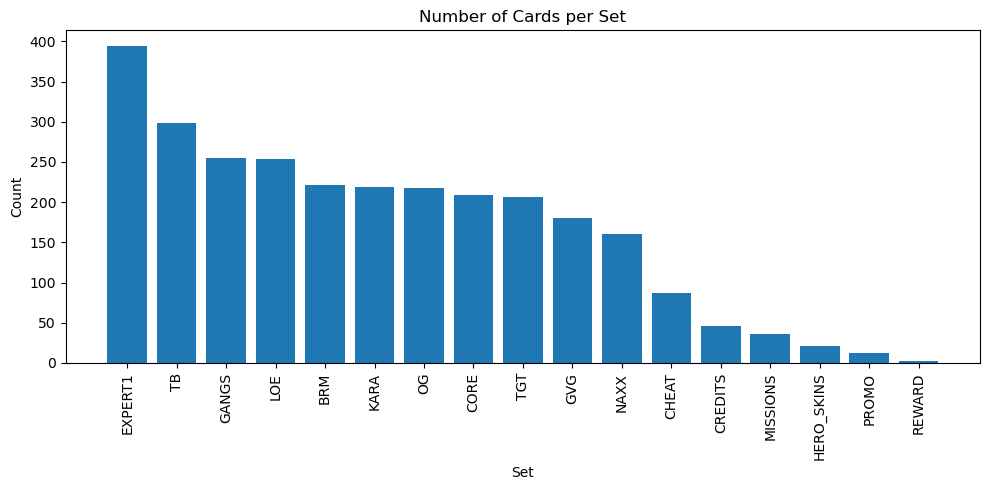

cost
0.0     345
1.0     340
2.0     392
3.0     323
4.0     244
5.0     201
6.0     121
7.0      58
8.0      38
9.0      30
10.0     70
11.0      1
12.0      3
25.0      1
50.0      1
Name: count, dtype: int64

Some cards don't have defined mana costs, such as enchantments. Those will be excluded from this investigation.
Note that having 0 mana cost is different from having no definite mana cost.


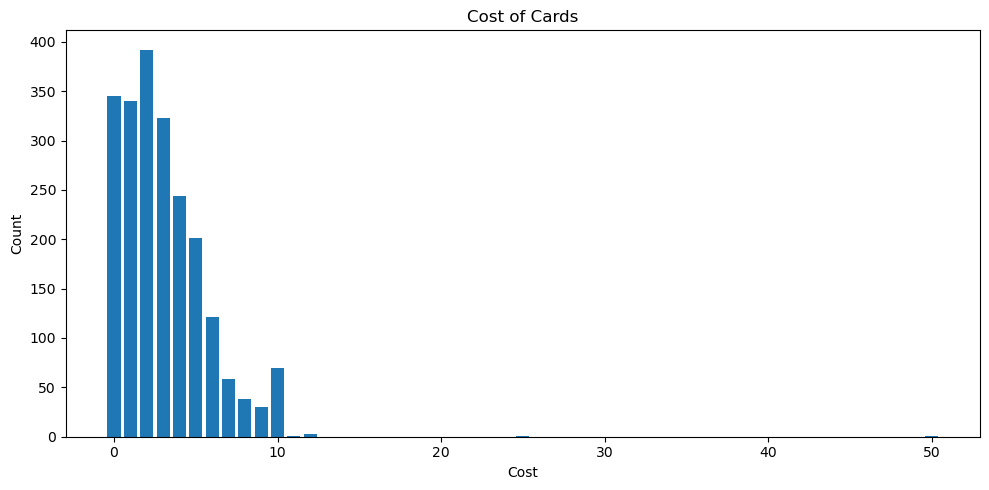

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cards.csv", encoding="cp1252")

# SET BARPLOT
set_counts = df['set'].value_counts()
print(set_counts)
print()
print("'TB' and everything from 'CHEAT' on right are special internal categories; everything else corresponds to a publicly known pre-2017 set.")
print("Those will be excluded from this investigation, as they are not usable in typical play.")

plt.figure(figsize=(10, 5))
plt.bar(set_counts.index, set_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Set")
plt.ylabel("Count")
plt.title("Number of Cards per Set")

plt.tight_layout()
plt.show()


# TYPE BARPLOT
cost_counts = df['cost'].value_counts().sort_index()
print(cost_counts)
print()
print("Some cards don't have defined mana costs, such as enchantments. Those will be excluded from this investigation.")
print("Note that having 0 mana cost is different from having no definite mana cost.")

plt.figure(figsize=(10, 5))
plt.bar(cost_counts.index, cost_counts.values)
plt.xticks()
plt.xlabel("Cost")
plt.ylabel("Count")
plt.title("Cost of Cards")

plt.tight_layout()
plt.show()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   card_id               2819 non-null   object 
 1   playerClass           2816 non-null   object 
 2   type                  2818 non-null   object 
 3   name                  2818 non-null   object 
 4   set                   2818 non-null   object 
 5   text                  2386 non-null   object 
 6   cost                  2168 non-null   float64
 7   attack                1258 non-null   float64
 8   health                1368 non-null   float64
 9   rarity                1399 non-null   object 
 10  collectible           1070 non-null   object 
 11  flavor                1056 non-null   object 
 12  race                  328 non-null    object 
 13  how_to_earn           245 non-null    object 
 14  how_to_earn_golden    290 non-null    object 
 15  targeting_arrow_text 

In [3]:
print("We will exclude all cards part of a set that is a special internal category, as well as those without a defined mana cost (e.g. enchantments).")
print()

excluded_sets = ['TB', 'CHEAT', 'CREDITS', 'MISSIONS', 'HERO_SKINS', 'PROMO', 'REWARD']

# Filter out excluded sets AND rows with missing set AND rows with missing cost
df = df[df['set'].notna() & ~df['set'].isin(excluded_sets) & df['cost'].notna()]
df.info()

We will exclude all cards part of a set that is a special internal category, as well as those without a defined mana cost (e.g. enchantments).

<class 'pandas.core.frame.DataFrame'>
Index: 1789 entries, 0 to 2815
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   card_id               1789 non-null   object 
 1   playerClass           1789 non-null   object 
 2   type                  1789 non-null   object 
 3   name                  1789 non-null   object 
 4   set                   1789 non-null   object 
 5   text                  1598 non-null   object 
 6   cost                  1789 non-null   float64
 7   attack                1095 non-null   float64
 8   health                1037 non-null   float64
 9   rarity                1176 non-null   object 
 10  collectible           1050 non-null   object 
 11  flavor                1051 non-null   object 
 12  race                  300 non-null 

## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

C:\Users\ecarter\AppData\Local\Temp\ipykernel_1892\3773166025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


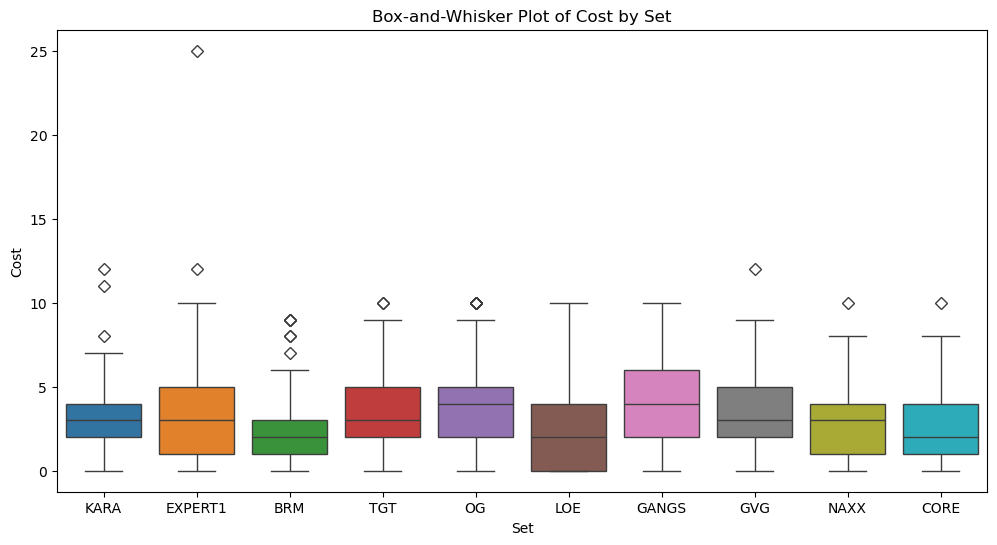

In [4]:
import seaborn as sns

plt.figure(figsize=(12, 6))

# Define a color palette with 10 distinct colors
palette = sns.color_palette("tab10", n_colors=10) # tab10 has 10 distinct colors

# Create the boxplot
sns.boxplot(
    x='set', 
    y='cost', 
    data=df, 
    palette=palette, # color each box differently
    flierprops=dict(marker='D', color='red', markersize=6) # diamond-shaped outliers
)

plt.title('Box-and-Whisker Plot of Cost by Set')
plt.xlabel('Set')
plt.ylabel('Cost')
plt.xticks()
plt.show()

In [5]:
outliers = []

for s in df['set'].unique():
    subset = df[df['set'] == s]['cost']
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter outliers
    subset_outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    for val in subset_outliers:
        outliers.append({'set': s, 'cost': val})

# Convert to DataFrame for easy printing
outliers_df = pd.DataFrame(outliers)
print("All outliers (set and cost):")
print(outliers_df)

All outliers (set and cost):
        set  cost
0      KARA  12.0
1      KARA  11.0
2      KARA   8.0
3   EXPERT1  12.0
4   EXPERT1  25.0
5       BRM   9.0
6       BRM   8.0
7       BRM   9.0
8       BRM   9.0
9       BRM   7.0
10      BRM   8.0
11      TGT  10.0
12      TGT  10.0
13       OG  10.0
14       OG  10.0
15       OG  10.0
16       OG  10.0
17       OG  10.0
18       OG  10.0
19       OG  10.0
20       OG  10.0
21      GVG  12.0
22     NAXX  10.0
23     CORE  10.0


In [7]:
print("Probability per set of cost > 3:")
for s in df['set'].unique():
    subset = df[df['set'] == s]
    prob = (subset['cost'] > 3).mean()
    print(f"Set {s}: {prob}")

overall_prob = (df['cost'] > 3).mean()
print(f"\nOverall probability of cost > 3: {overall_prob}")

Probability per set of cost > 3:
Set KARA: 0.2962962962962963
Set EXPERT1: 0.3550488599348534
Set BRM: 0.23125
Set TGT: 0.42138364779874216
Set OG: 0.503030303030303
Set LOE: 0.31527093596059114
Set GANGS: 0.5887850467289719
Set GVG: 0.4825174825174825
Set NAXX: 0.2982456140350877
Set CORE: 0.30246913580246915

Overall probability of cost > 3: 0.383454443823365


## 🧠 My Answer

In conclusion, the mana cost of a card is dependent on the set it is part of. We can see this through the box-and-whisker plot, studying outliers, and conditional probability.

Each Hearthstone card belongs to a single set (only EXPERT1 and CORE are free to use), and is stored by abbreviation in the dataset.

For example, Curse of Naxxramas is stored as NAXX. I have used those abbreviations, with clarifications in parentheses, for this answer.

Cards within internal categories (e.g. CREDITS, which contains cards depicting developers that are not playable), as well as those with no defined mana cost, were excluded.

The box-and-whisker plot shows the median mana cost is 2 for BRM (Blackrock Mountain), LOE (League of Explorers), and CORE (free post-2014 cards).

Meanwhile, it appears to be 4 for GANGS (Mean Streets of Gadgetzan) and OG (Whispers of the Old Gods). GANGS and OG also have higher Q1s and Q3s than BRM and LOE.

All outliers were above the median, of which the sets with the most outliers were OG (8) and BRM (6). EXPERT1 (free pre-2014 cards) had the most extreme outlier (25).

There were a high number of outliers around 10, especially within OG. This makes sense, as 10 is a natural number to assign to mana cost.

Because OG has a theme of powerful cosmic entities, it also makes sense that it would have especially many cards of high mana cost, in this case 8 cards with a mana cost of 10.

The conditional probability shows that GANGS and OG were the only sets to have a probability above 50% of a random card having a mana cost above 3.

This aligns with what we previously saw, where they were the only sets with a median of 4. Some sets also had noticeably small conditional probabilities too.

BRM and KARA (One Night in Karazhan) had the lowest probability of being over 3. Interestingly, BRM had many high outliers too, which shows a highly asymmetric distribution.